# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [497]:
# Initial imports
import os
import pandas as pd
import nltk as nltk
import matplotlib.pyplot as plt

from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords

nltk.download('vader_lexicon')
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adam/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [498]:
# Load .env
load_dotenv()

# Read your api key environment variable
api_key = os.getenv('NEWS_API_KEY')

# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [ ]:
# Fetch the Bitcoin news articles
btc_news = newsapi.get_everything(
    q='bitcoin', 
    language='en',
)

# Fetch the Ethereum news articles
eth_news = newsapi.get_everything(
    q='ethereum', 
    language='en',
)

In [500]:
def create_sentiment_df(news_data):
    sentiments = []

    for article in news_data["articles"]:
        try:
            text = article["content"]
            date = article["publishedAt"][:10]
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment["compound"]
            pos = sentiment["pos"]
            neu = sentiment["neu"]
            neg = sentiment["neg"]
            
            sentiments.append({
                "text": text,
                "date": date,
                "compound": compound,
                "positive": pos,
                "negative": neg,
                "neutral": neu
                
            })
            
        except AttributeError:
            pass
        
    # Create DataFrame
    df = pd.DataFrame(sentiments)

    # Reorder DataFrame columns
    cols = ["date", "text", "compound", "positive", "negative", "neutral"]
    df = df[cols]

    return df



In [501]:
# Create the Bitcoin sentiment scores DataFrame
btc_df = create_sentiment_df(btc_news)
btc_df.head()

,date,text,compound,positive,negative,neutral
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [502]:
# Create the Ethereum sentiment scores DataFrame
eth_df = create_sentiment_df(eth_news)
eth_df.head()

,date,text,compound,positive,negative,neutral
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844
2,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
3,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812
4,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879


In [503]:
# Describe the Bitcoin Sentiment
btc_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,0.004840,0.066750,0.060700,0.872550
std,0.385859,0.064594,0.061425,0.090583
min,-0.549900,0.000000,0.000000,0.557000
25%,-0.335475,0.000000,0.000000,0.852250
50%,0.012800,0.064000,0.063000,0.891000
75%,0.254725,0.085000,0.077000,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [504]:
# Describe the Ethereum Sentiment
eth_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.081860,0.053050,0.069000,0.877900
std,0.481385,0.064728,0.072897,0.074939
min,-0.784500,0.000000,0.000000,0.681000
25%,-0.381800,0.000000,0.000000,0.827250
50%,-0.273200,0.023000,0.063000,0.899500
75%,0.303775,0.085000,0.077750,0.935500
max,0.735100,0.188000,0.233000,1.000000


### Sentiment Analysis Results

1. Bitcoin had the highest mean positive score at `0.066750`

2. Bitcoin had the highest compound score at `0.750600`

3. Bitcoin had the highest positive score at `0.202000`

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [505]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [506]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
sw = sw.union({
    'char', 
    'chars',
    'cryptocurrencies',
    'cryptocurrency',
    'crypto',
    'ha',
})

In [507]:
# Complete the tokenizer function
def tokenize(text):
    """Tokenizes text."""

    if type(text) == list:
        text = ' '.join(text)
    
    # Remove the punctuation from text
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)

    # Create a tokenized list of the words
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words
    lem = [lemmatizer.lemmatize(word) for word in words]

    # Convert the words to lowercase and remove the stop words
    output = [word.lower() for word in lem if word.lower() not in sw]
    
    return output

In [508]:
# Create a new tokens column for Bitcoin
btc_df['tokens'] = [tokenize(text) for text in btc_df['text']]
btc_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-05-10,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, womenfocused, space, od..."
1,2022-05-04,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[bitcoin, mining, site, powered, otherwise, lo..."
2,2022-04-14,Wikipedia editors have voted in favor of dropp...,0.4019,0.088,0.000,0.912,"[wikipedia, editor, voted, favor, dropping, wi..."
3,2022-05-02,Warren Buffett has always been a bitcoin skept...,-0.3269,0.085,0.143,0.772,"[warren, buffett, always, bitcoin, skeptic, bi..."
4,2022-05-09,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[image, source, getty, imagesthe, value, bitco..."


In [509]:
# Create a new tokens column for Ethereum
eth_df['tokens'] = [tokenize(text) for text in eth_df['text']]
eth_df.head()

,date,text,compound,positive,negative,neutral,tokens
0,2022-04-14,The US Department of Treasury says Lazarus is ...,-0.7845,0.088,0.231,0.681,"[us, department, treasury, say, lazarus, behin..."
1,2022-04-13,"18 with 15 posters participating, including st...",0.1027,0.084,0.071,0.844,"[poster, participating, including, story, auth..."
2,2022-05-10,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[meta, revealed, nfts, work, instagram, usbase..."
3,2022-04-15,"Opera launched its dedicated ""Crypto Browser"" ...",0.7351,0.188,0.000,0.812,"[opera, launched, dedicated, browser, beta, ba..."
4,2022-05-02,A multi-billion dollar cryptocurrency company ...,-0.2263,0.046,0.075,0.879,"[multibillion, dollar, company, apologised, us..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [510]:
from collections import Counter
from nltk import ngrams

In [511]:
def get_words(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenize(corpus_string)
    words = Counter(processed)
    output = [word.lower() for word in words if word.lower() not in sw]
    return output

In [512]:
def get_bigrams(corpus):
    corpus_string = ' '.join(corpus)
    processed = tokenize(corpus_string)
    bigrams = ngrams(processed, n=2)
    bigrams_list = Counter(bigrams)
    return bigrams_list

In [513]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, ngrams=False, N=10):
    """Returns the top N tokens from the frequency count"""
    top_10 = dict(Counter(tokens).most_common(N))
    columns = ['word', 'count'] if ngrams == False else ['bigram', 'count']
    return pd.DataFrame(list(top_10.items()), columns=columns)

In [514]:
# Generate the Bitcoin N-grams where N=2
btc_corpus = [article['content'] for article in btc_news['articles']]
btc_bigrams = get_bigrams(btc_corpus)
token_count(btc_bigrams)

,word,count
0,"(reuters, bitcoin)",5
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(may, reuters)",4
6,"(wikipedia, editor)",2
7,"(april, reuters)",2
8,"(interest, rate)",2
9,"(bitcoin, dropped)",2


In [515]:
# Generate the Ethereum N-grams where N=2
eth_corpus = [article['content'] for article in eth_news['articles']]
eth_bigrams = get_bigrams(eth_corpus)
token_count(eth_bigrams, ngrams=True)

,bigram,count
0,"(reuters, bitcoin)",4
1,"(previous, closebitcoin)",4
2,"(closebitcoin, world)",4
3,"(world, biggest)",4
4,"(biggest, bestknown)",4
5,"(may, reuters)",3
6,"(yacht, club)",2
7,"(april, reuters)",2
8,"(bitcoin, dropped)",2
9,"(bestknown, year)",2


In [516]:
# Use token_count to get the top 10 words for Bitcoin
btc_words = tokenize(btc_corpus)
token_count(btc_words)

,word,count
0,bitcoin,11
1,world,6
2,reuters,6
3,week,5
4,april,4
5,investor,4
6,dropped,4
7,previous,4
8,closebitcoin,4
9,biggest,4


In [517]:
# Use token_count to get the top 10 words for Ethereum
eth_words = tokenize(eth_corpus)
token_count(eth_words)

,word,count
0,bitcoin,7
1,ethereum,5
2,biggest,5
3,reuters,5
4,world,5
5,may,5
6,april,4
7,year,4
8,previous,4
9,closebitcoin,4


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [518]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

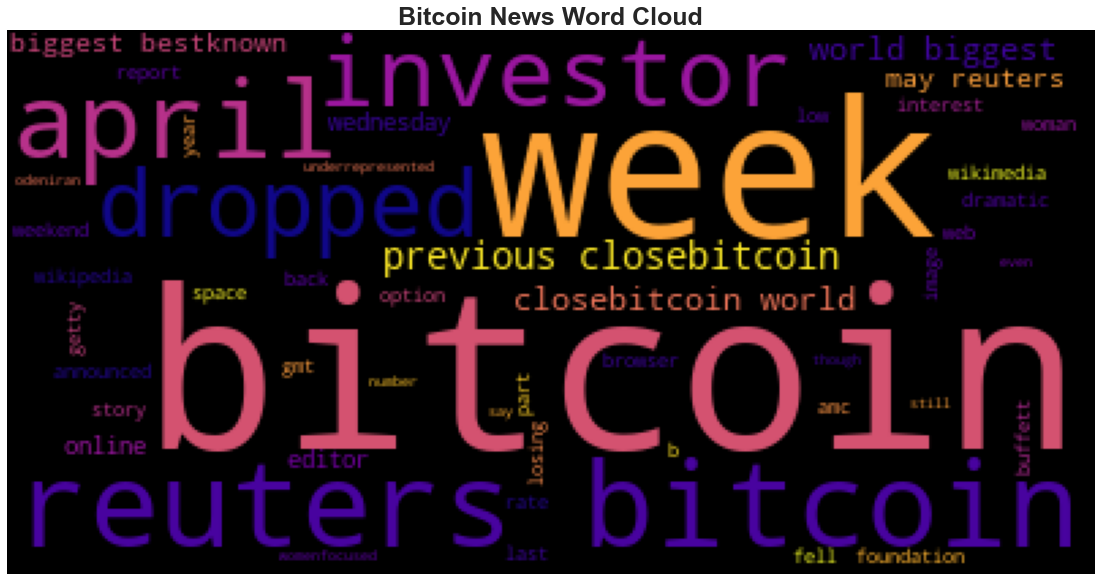

In [534]:
# Generate the Bitcoin word cloud
btc_tokens = tokenize(btc_corpus)
btc_wc = WordCloud(colormap='plasma', max_words=50).generate(' '.join(btc_tokens))
plt.title('Bitcoin News Word Cloud', fontdict={'fontsize': 25, 'fontweight': 'bold'})
plt.axis('off')
plt.imshow(btc_wc)
plt.show()

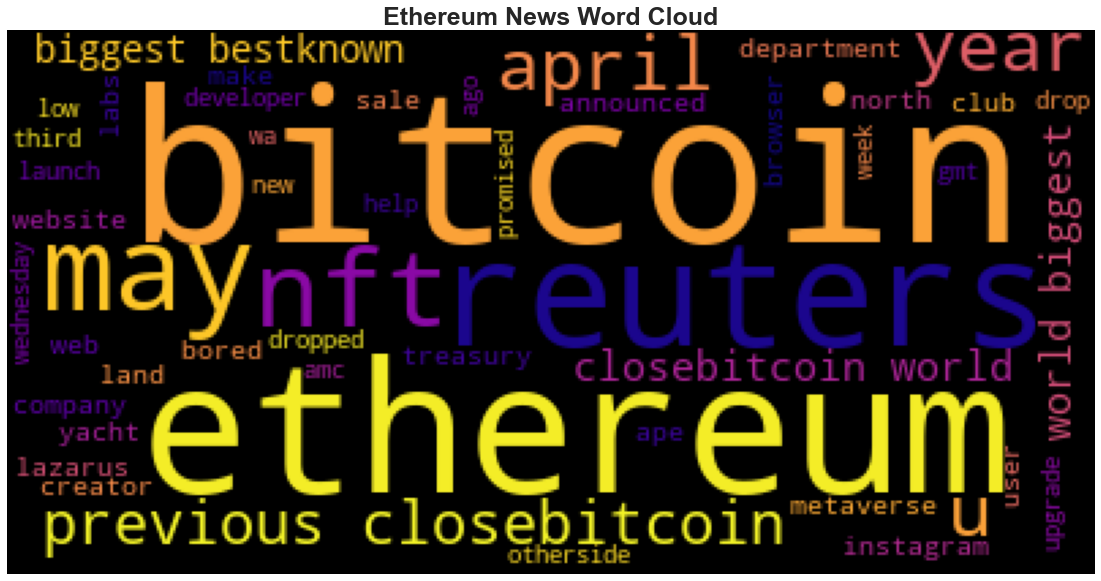

In [535]:
# Generate the Ethereum word cloud
eth_tokens = tokenize(eth_corpus)
eth_wc = WordCloud(colormap='plasma', max_words=50).generate(' '.join(eth_tokens))
plt.title('Ethereum News Word Cloud', fontdict={'fontsize': 25, 'fontweight': 'bold'})
plt.axis('off')
plt.imshow(eth_wc)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [536]:
import spacy
from spacy import displacy

In [537]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [538]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [539]:
# Concatenate all of the Bitcoin text together
btc_corpus_str = ' '.join(btc_corpus).replace('\n', '')
btc_corpus_str[:500]

'Now, even though there are a number of women-focused crypto spaces, Odeniran says women are still underrepresented. Ive been in spaces where Im the only Black person, or the only woman, or the only B… [+3828 chars] A Bitcoin mining site powered by otherwise lost gas from an oil well near Linden, Texas, on April 4th, 2022. | Photo by FRANCOIS PICARD/AFP via Getty Images\r  Of all the corporate climate hype fl… [+6544 chars] Wikipedia editors have voted in favor of dropping cryptocurrency from the '

In [540]:
# Run the NER processor on all of the text
btc_doc = nlp(btc_corpus_str)
btc_doc.user_data["title"] = "Bitcoin NER"

In [541]:
# Render the visualization
displacy.render(btc_doc, style='ent')

In [542]:
# List all Entities
print([ent.text for ent in btc_doc.ents])

['Odeniran', 'Linden', 'Texas', 'April 4th, 2022', 'Photo', 'FRANCOIS PICARD/AFP', 'Getty Images\r  ', 'Wikipedia', "the Wikimedia Foundation's", 'Ars Technica', 'GorillaWarfare', 'Warren Buffett', 'the weekend', 'Getty Images\r', 'the weekend', '34,000', '27,630', 'Coinbase', '+2164', 'Last week', 'Fidelity Investments', 'the US Treasury', 'April 12', 'Reuters', '$10 billion', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', 'last July', '33,000', 'the week', 'last week', 'Fed', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39,862.84', 'Wednesday', '2,102.94', '20.9%', 'year', 'Gucci handbag', 'week', 'Kristy Kilburn', 'May 11', 'Reuters', '7.23%', '28,758.29', 'GMT', 'Wednesday', '2,241.68', '40.4%', 'May 9', 'Reuters', '7.81%', '31,333.41', 'GMT', 'Monday', '2,655.98', '35%', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Mexican', 'North London', 'a few weeks ago', '+2779', 'Opera', 'Crypto Browser', 'Ja

---

### Ethereum NER

In [543]:
# Concatenate all of the Ethereum text together
eth_corpus_str = ' '.join(eth_corpus).replace('\n', '')
eth_corpus_str[:500]

'The US Department of Treasury says Lazarus is behind the attack\rThe US Treasury Department blames North Korean hacking group Lazarus for stealing $625 million in cryptocurrency from the Ronin networ… [+1853 chars] 18 with 15 posters participating, including story author\rMore than 200 long-time Wikipedia editors have requested that the Wikimedia Foundation stop accepting cryptocurrency donations.\xa0The foundatio… [+4016 chars] Meta has revealed more of how NFTs will work on Instagram. In the US-bas'

In [544]:
# Run the NER processor on all of the text
eth_doc = nlp(eth_corpus_str)
eth_doc.user_data["title"] = "Ethereum NER"


In [545]:
# Render the visualization
displacy.render(eth_doc, style='ent')

In [546]:
# List all Entities
print([ent.text for ent in eth_doc.ents])

['The US Department of Treasury', 'The US Treasury Department', 'North Korean', '$625 million', 'Ronin', '18', '15', 'More than 200', 'Wikipedia', 'the Wikimedia Foundation', '+4016', 'Instagram', 'US', 'Instagram', 'Crypto Browser', 'January', 'Windows, Mac', 'Android', 'Ethereum', 'Yuga Labs', 'Yacht Club', 'Yuga Labs', 'Otherside NFT', 'April 30', 'NFT', '+6669', 'Ethereum', 'more than five years', '100,000', 'North Korea', 'US', 'NBC News', 'Reuters', 'No.2', 'second', 'AMC', 'April 15', 'AMC', 'Adam Aron', 'Last night', 'Bloomberg', 'nearly a third', 'a billion dollars', 'Early this week', 'the Ukrainian Computer Emergency Response Team', 'Slovakian', 'Russia', '47,454', '34,007', '28%.About a third', 'this week', 'Ethereum', 'Merge', 'a few months after June', 'first', 'a year and a half ago', 'The Order Flow', 'Dan Robinson', "Georgios Konstantopoulos'", 'August 20', 'April 26', 'Reuters', '5.1%', '38,391.36', 'Tuesday', '2,229.82', '16%', 'year', 'May 4', 'Reuters', '5.7%', '39

---